# HR-Analysis: Predicting Job-Seeker
An analytical model to assist recruiters on LinkedIn to increase their recruitment success rate.

<br>

**Goal:**
- obtain important features for predicting job-changer
- the best model that automatically predict job-changer (>80% accuracy rate) 

**Dataset:**
- shuffled_encoded.csv

**Models:**
1. CART
2. Random Forest
3. Support Vector Classifier (SVC)
4. Extreme Gradient Boosting (XGBoost)
5. Logistic Regression

**PipeLine:**
1. `Train-test split`
2. Train on dataset (4 models)
3. Final model `evaluation` with test dataset

**Model Explainer:**
- `SHapley Additive exPlanations (SHAP)` is employed to explain predictions of the random forest model for both individual record data and the weighted overall importance of each variable.
- Hence, each data record can be well explained using SHAP algorithm, which provides a qualitative understanding between the input variables and the response to facilitate understanding and decision-making.

<br>

<hr>



## 1) Pre-modelling preparations

- Install dependencies
- Import libraries and dataset
- Train-test split + SMOTE
- Evaluation metrics

### 1.1 Import libraries and dataset

#### 1.1 (a) Import libraries

In [2]:
# import basic libraries
import numpy as np 
import pandas as pd 
import os   
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sb 
import squarify
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.tree import plot_tree

#### 1.1 (b) Import dataset

In [3]:
df = pd.read_csv('archive/shuffled_encoded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18253 entries, 0 to 18252
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            18253 non-null  float64
 1   relevent_experience               18253 non-null  int64  
 2   enrolled_university               18253 non-null  float64
 3   education_level                   18253 non-null  float64
 4   experience                        18253 non-null  int64  
 5   company_size                      18253 non-null  float64
 6   company_type                      18253 non-null  float64
 7   last_new_job                      18253 non-null  int64  
 8   training_hours                    18253 non-null  int64  
 9   target                            18253 non-null  float64
 10  gender_Female                     18253 non-null  float64
 11  gender_Male                       18253 non-null  float64
 12  gend

In [4]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Not provided,gender_Other,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,0.924,1,2.0,0.0,11,3.0,5.0,1,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.804,1,0.0,3.0,17,3.0,2.0,1,57,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.920,1,0.0,3.0,11,3.0,6.0,1,32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.920,1,2.0,3.0,9,5.0,5.0,1,168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.893,0,0.0,2.0,20,6.0,6.0,2,47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 1.1 (c) Exploring the response variable, `target`

**(i) Shifting the column `target` to the last column of the dataframe**

In [5]:
temp = df['target']
df.pop('target') # remove column of predictor and store it in df1
df['target']=temp # add back to the last column
data = df
data.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,gender_Female,gender_Male,gender_Not provided,gender_Other,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,target
0,0.924,1,2.0,0.0,11,3.0,5.0,1,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804,1,0.0,3.0,17,3.0,2.0,1,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.920,1,0.0,3.0,11,3.0,6.0,1,32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.920,1,2.0,3.0,9,5.0,5.0,1,168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.893,0,0.0,2.0,20,6.0,6.0,2,47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**(ii) Display level counts of `target` variable**

In [6]:
data['target'].value_counts()

0.0    13838
1.0     4415
Name: target, dtype: int64

**(iii) Display distribution of `target` in a diagram**

/var/folders/xr/3fgdpnbj38v_32gf1_x3h2x00000gn/T/ipykernel_43638/3483243422.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


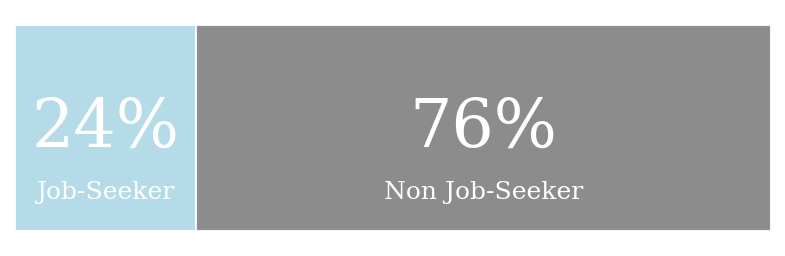

In [7]:
x=data.groupby(['target'])['target'].count()
y=len(data)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)

ax.barh(ratio.index, ratio[1.0], color='lightblue', alpha=0.9, ec="white", label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec='w', label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


### 1.2 Train-Test Split

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#First normalize the data

#X = StandardScaler().fit_transform(data.iloc[:,:-1])
X = pd.DataFrame(data,columns = data.columns[:-1])

#X = data.loc[:, data.columns != 'target']
y = data.loc[:, data.columns == 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (12777, 19)
y_train shape: (12777, 1)
X_test shape: (5476, 19)


### 1.3 Synthetic Minority Oversampling Technique (SMOTE)
- Oversampling on trainset

In [9]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)
X_train_os = pd.DataFrame(data = X_train_os, columns = X.columns)
y_train_os = pd.DataFrame(data = y_train_os, columns = y.columns)


# check the oversampled data (train)
print("===== Oversampled data =====")

num_of_job_seeker = len(y_train_os[y_train_os['target'] == 1])
num_of_no_job_seeker = len(y_train_os[y_train_os['target'] == 0])
num_rows = len(X_train_os)

print("Total number of rows:", num_rows)
print("Number of target == 0 rows:", num_of_no_job_seeker)
print("Number of target == 1 rows:", num_of_job_seeker)

print("Proportion of target == 0:", num_of_no_job_seeker/num_rows)
print("Proportion of target == 1:", num_of_job_seeker/num_rows)

===== Oversampled data =====
Total number of rows: 19310
Number of target == 0 rows: 9655
Number of target == 1 rows: 9655
Proportion of target == 0: 0.5
Proportion of target == 1: 0.5


### 1.4 Metrics to Measure Performance

- Classification Accuracy (5-fold cross validation with roc-auc-score)
- Confusion Matrix with true positive rate and false negative rate
- Precision, Recall, and F-score
- Out-of-bag (oob) score (for random forest)
- ROC AUC Curve score

<br>

**Why ROC AUC Score instead of overall accuracy for the 5-fold cross validation score (we will term it as classification accuracy for eaiser understanding for business stakeholders)?**
- We care equally about true positive and true negative classes
- AUC calibrates the trade-off between sensitivity and specificity at the best-chosen threshold
- While overall accuracy measures how well a single model is doing, AUC compares two models as well as evaluates the same model's performance across different thresholds

<br>

**Reference:**
- https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc
- https://www.kdnuggets.com/2022/10/metric-accuracy-auc.html
- https://github.com/ztjhz/SC1015-Project/blob/main/Anime/classification.ipynb (done by Jing Qiang from SC1015 module 🐱‍👤)

In [10]:
# Confusion Matrix
from tabulate import tabulate
def confusion_matrix_TPR_TNR(y, y_pred, scores, train_test_string):
    from sklearn.metrics import confusion_matrix
    
    # Confusion Matrix
    c_matrix = confusion_matrix(y, y_pred)

    # True Negatives, False Positives, False Negatives, True Positives
    TN, FP, FN, TP = c_matrix.ravel()

    # True Positive Rate, True Negative Rate, False Positive Rate, False Negative Rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(TN+FP)
    FNR = FN/(TP+FN)

    table = [["Classification Accuracy", scores.mean()],
         ["True Positive Rate", TPR],
         ["True Negative Rate", TNR],
         ["False Positive Rate", FPR],
         ["False Negative Rate", FNR]]

    print(tabulate(table, headers=["Metric", "Value"], tablefmt="grid"))

    # Plot the Confusion Matrix
    plt.figure(figsize=(5, 3))
    sb.heatmap(c_matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix ({train_test_string} Dataset)")
    print()
    return scores.mean(), TPR, TNR, FPR, FNR 

In [11]:
# Precision and Recall
def get_precision_recall(y, y_pred):
    from sklearn.metrics import precision_score, recall_score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    
    return precision, recall

# F-score
def get_f1_score(y, y_pred):
    from sklearn.metrics import f1_score
    
    f1 = f1_score(y, y_pred)
    
    print("f1_score:", f1)
    
    return f1

In [12]:
# Out-of-bag (oob) score
def get_oob_score(random_forest):
    print("oob score:", round(random_forest.oob_score_ * 100, 2), "%")

In [13]:
# ROC AUC Curve score
def ROC_AUC(random_forest, X_train, y_train, train_test):
    try:
        # getting the probabilities of our predictions
        y_scores = random_forest.predict_proba(X_train)
        y_scores = y_scores[:,1]

        from sklearn.metrics import roc_curve
        # compute true positive rate and false positive rate
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

        # plotting them against each other
        def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
            plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
            plt.plot([0, 1], [0, 1], 'r', linewidth=4)
            plt.axis([0, 1, 0, 1])
            plt.xlabel('False Positive Rate (FPR)', fontsize=16)
            plt.ylabel('True Positive Rate (TPR)', fontsize=16)
            plt.title(f'{train_test} Dataset')

        plt.figure(figsize=(8, 5))
        plot_roc_curve(false_positive_rate, true_positive_rate)
        plt.show()


        # ROC AUC Score
        from sklearn.metrics import roc_auc_score
        r_a_score = roc_auc_score(y_train, y_scores)
        print("ROC-AUC-Score:", r_a_score)
    except:
        pass

**Function that evaluates a classifier model's performance based on various metrics**
- Cross Validation prediction (CV=5)

In [14]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [15]:
def model_performance(classifier_model, X_train, X_test, y_train, y_test):
    #Predict values based on new parameters
    
    y_train_pred = classifier_model.predict(X_train)
    y_test_pred = classifier_model.predict(X_test)

    train_scores = accuracy_score(y_train, y_train_pred)
    test_scores = accuracy_score(y_test, y_test_pred)

    print("-----\n-> Test Dataset")
    (acc_test, TPR, TNR, FPR, FNR)  = confusion_matrix_TPR_TNR(y_test, y_test_pred, test_scores, "Test")
    p_test,r_test = get_precision_recall(y_test, y_test_pred)
    f1_test = get_f1_score(y_test, y_test_pred)
    ROC_AUC(classifier_model, X_test, y_test, "Test")
    print('-----\n')
    
    #return acc_train,p_train,r_train,f1_train,acc_test,p_test,r_test,f1_test
    
    return acc_test, TPR, TNR, FPR, FNR,p_test,r_test,f1_test

## 2) Feature Selection 


### 2.1 Tree Family: Obtaining Feature Importance Scores and their Mean Values for each model

Select best features to be used in machine learning models based on Multi-model feature score weighted screening:
1. Decision Tree
2. Random Forest 
3. Extra Trees
4. GradientBoostingClassifier

#### 2.1 (a) Obtaining Feature Importance Scores for each model

In [16]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Set number of folds and out-of-bag score
N = 5
oob = 0

# Initialize empty pandas DataFrame to store feature importances
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=data.columns[:-1])

# Initialize StratifiedKFold with specified parameters
skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

# Create list of models to evaluate
model_list = [
              DecisionTreeClassifier(),
              ExtraTreesClassifier(),
              RandomForestClassifier(n_estimators=500, max_depth=5),
              GradientBoostingClassifier()
             ]
# Create list of model names
model_name_list = ['CART', 'ETC', 'RF', 'GBC']

# Loop through each model in model_list
for j, model_name in enumerate(model_name_list):
    
    # Select model from leaderboard
    leaderboard_model = model_list[j]
    
    # Loop through each fold of the cross-validation process
    for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        # Fit the model to the training data
        leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
        
        # Compute feature importances, depending on model type
        importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
        # Compute mean feature importance values across all folds
        importances[model_name] = np.mean(importances[['Fold_{}'.format(i) for i in range(1, N + 1)]], axis=1)
        
# Select only the rows and columns corresponding to mean feature importance values for each model
importances = importances.iloc[:, N:]


/var/folders/xr/3fgdpnbj38v_32gf1_x3h2x00000gn/T/ipykernel_43638/582942040.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
/var/folders/xr/3fgdpnbj38v_32gf1_x3h2x00000gn/T/ipykernel_43638/582942040.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
/var/folders/xr/3fgdpnbj38v_32gf1_x3h2x00000gn/T/ipykernel_43638/582942040.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  leaderboard_model.fit(X_train.iloc[trn_idx], y_train.iloc[trn_idx])
/var/folders/xr/3fgdpnbj38v_32gf1_x3h2x00000gn/T/ipykernel_43638/582942040.py:3

In [17]:
#use different models to calculate importance 
importances = (importances-importances.min())/(importances.max()-importances.min())
#importances = importances / importances.sum()

#### 2.1 (b) Calculating Mean Importance for each feature

In [109]:
## Take the average, and then use the top 8 as the final choice.
importances['Mean_Importance'] = importances.mean(axis=1)
selected_index = np.argsort(importances['Mean_Importance'].values.reshape(-1))[::-1][:8]b

array([0, 2, 8, 4, 5, 7, 3, 6])

In [112]:
X_train_selected = X_train_os.iloc[:,selected_index]
X_test_selected = X_test.iloc[:,selected_index]


#### 2.1 (c) Displaying the importance scores in a table

In [19]:
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)
importances

,CART,ETC,RF,GBC,Mean_Importance
city_development_index,1.000000,1.000000,1.000000,1.000000,1.000000
enrolled_university,0.075091,0.315798,0.327446,0.071635,0.197492
experience,0.123774,0.236879,0.094203,0.021020,0.118969
training_hours,0.181903,0.217523,0.005510,0.007844,0.103195
company_size,0.074648,0.152691,0.024495,0.021576,0.068353
last_new_job,0.050094,0.098999,0.008469,0.002038,0.039900
education_level,0.036226,0.078708,0.020054,0.010210,0.036300
company_type,0.033485,0.080681,0.023599,0.006236,0.036000
major_discipline_STEM,0.004829,0.035785,0.039638,0.002422,0.020669
relevent_experience,0.016047,0.038028,0.022646,0.001850,0.019643


#### 2.1 (d) Visualing Mean Importance Scores 

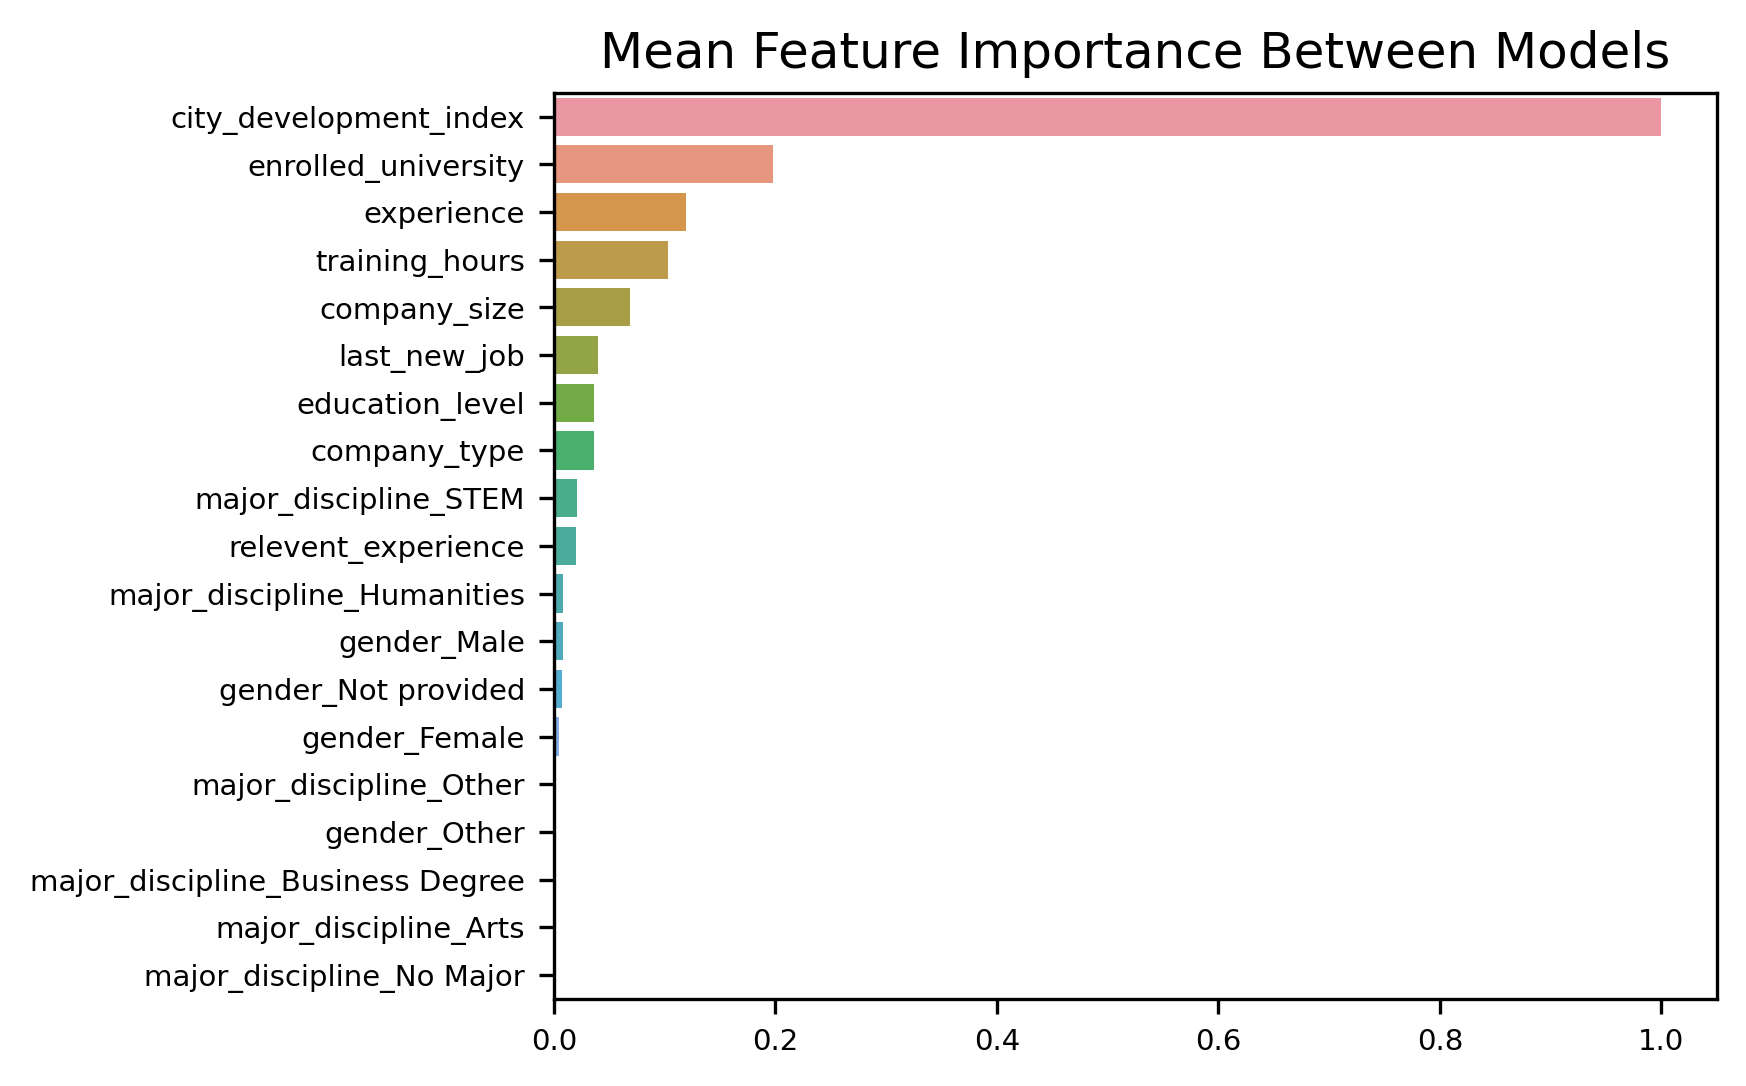

In [20]:
## Based on the model results, we can calculate the contribution of each feature and visualize it as shown below, 
# the longer the horizontal bar, the more valuable the feature is.
plt.figure(figsize=(5, 4), dpi =300)
sb.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.title('Mean Feature Importance Between Models', size=12)

plt.show()

### 2.2 Logistic Regression RFE get  Important Features

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Logistic (Logistic Regression) summary with p-values and pseudo R-squared
# https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit
def logitSummary(X, y, rfe):
    # top features
    pki_df_top_features = rfe.get_feature_names_out()
    
    # summary with p-values and pseudo R-squared
    logit_model = sm.Logit(y, X[pki_df_top_features])
    # logit_model_result = logit_model.fit()
    logit_model_result = logit_model.fit_regularized()

    print(logit_model_result.summary2())

    return (logit_model, logit_model_result)

def fitLogRegModel(X_train, y_train, X_test, y_test, rfe):
    # top features
    pki_df_top_features = rfe.get_feature_names_out()

    # Logistic Regression
    logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
    logreg_model_result = logreg_model.fit(X_train[pki_df_top_features], y_train.values.ravel())


    print('Train Accuracy: {:.2f}'.format(logreg_model.score(X_train[pki_df_top_features], y_train.values.ravel())))
    print('Test Accuracy: {:.2f}'.format(logreg_model.score(X_test[pki_df_top_features], y_test.values.ravel())))

    return (logreg_model, logreg_model_result);


In [22]:
# Create a Linear Regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
# Create an RFE object with n_features_to_select=10
rfe_10 = RFE(model, n_features_to_select=8,step=1)
# Fit the RFE object to the data
rfe_10.fit(X_train, y_train)
# model summary
(logit_m10, logit_m10_result) = logitSummary(X_train, y_train, rfe_10)

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2643521330753546
            Iterations: 78
            Function evaluations: 78
            Gradient evaluations: 78
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.525    
Dependent Variable:         target                 AIC:                    6771.2544
Date:                       2023-04-02 15:48       BIC:                    6830.8976
No. Observations:           12777                  Log-Likelihood:         -3377.6  
Df Model:                   7                      LL-Null:                -7104.5  
Df Residuals:               12769                  LLR p-value:            0.0000   
Converged:                  1.0000                 Scale:                  1.0000   
No. Iterations:             78.0000                                                 
------------------------------------------------------------

#### (b) Logistic Regression Top 10 Important Features
- city_development_index
- relevent_experience
- enrolled_university
- education_level
- gender_Male
- major_discipline_Humanities
- major_discipline_No Major
- major_discipline_STEM

However, the logistic regression model only gives 0.526 R-squared, indicating it may not have great ability in explaining this dataset. Hence, we will use the selected top 8 features from tree family models, which have been trained with cross-validation and 5 different models

### 2.3 Select Top 8 Features

#### (a) Tree Family Top 8 Important Features
- city_development_index
- enrolled_university
- experience
- training_hours
- company_size
- last_new_job
- education_level
- company_type

In [23]:
# Save Selected Features
selected_columns = importances.index[:10]
print(selected_columns)

Index(['city_development_index', 'enrolled_university', 'experience',
       'training_hours', 'company_size', 'last_new_job', 'education_level',
       'company_type', 'major_discipline_STEM', 'relevent_experience'],
      dtype='object')


## 3) Modelling

**Models:**
- CART
- Random Forest
- Support Vector Classifier (SVC)
- Extreme Gradient Boosting (XGBoost)
- Logistic Regression

**We will train and test the different models in 3 different ways:**
1. Full dataset
2. Full Dataset + Hyperparameter Tuning
3. Dataset with selected features + Hyperparameter Tuning 


### 3.1 CART - Classification Tree


**Why CART?**

**References:**
- https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85
- https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

In [24]:
indexx = 0
final_answer = pd.DataFrame(columns = ['Model', 'Dataset','Accuracy','TPR', 'TNR', 'FPR', 'FNR', 'Precision','Recall','F1 Score'])

#### 3.1 (a) CART v1 - Full Dataset + Default Hyperparameters

In [25]:
# Decision Tree using Train Data
dectree_m1 = DecisionTreeClassifier()  # create the decision tree object
dectree_m1.fit(X_train_os, y_train_os)       # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree_m1.predict(X_train_os)
y_test_pred = dectree_m1.predict(X_test)

In [26]:
dectree_m1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.86943  |
+-------------------------+----------+
| True Positive Rate      | 0.766435 |
+-------------------------+----------+
| True Negative Rate      | 0.901267 |
+-------------------------+----------+
| False Positive Rate     | 0.098733 |
+-------------------------+----------+
| False Negative Rate     | 0.233565 |
+-------------------------+----------+

Precision: 0.7058404558404558
Recall: 0.7664346481051817
f1_score: 0.7348906192065257


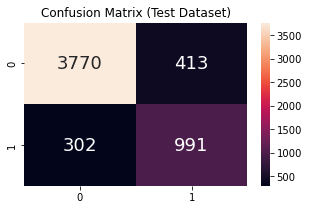

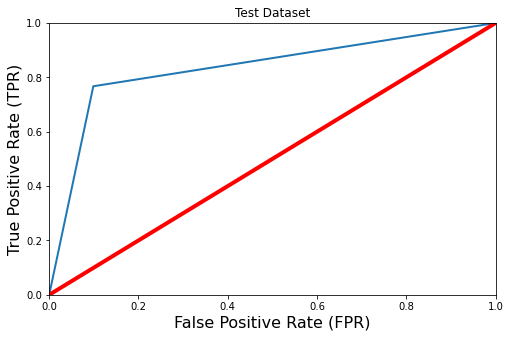

ROC-AUC-Score: 0.8341993584684002
-----

10


In [27]:
answer = model_performance(dectree_m1, X_train_os, X_test, y_train_os, y_test)
answer = ['CART'] +['All']+ list(answer)
print(len(answer))
final_answer.loc[indexx] = answer
indexx += 1

#### 3.1 (b) CART v2 - Full dataset + Hyperparameter Tuning

The hyperparameters will be tuned by using `GridSearchCV`.

In [28]:
# RFC Parameters tunning 
dectree_m2 = DecisionTreeClassifier()

In [29]:
# On all dataset 

## Search grid for optimal parameters
cart_param_grid = {"max_depth": [3,5,10],
              "max_features": [5,10,20]}

gsCART = GridSearchCV(dectree_m2,param_grid = cart_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsCART.fit(X_train_os, y_train_os)

CART_best = gsCART.best_estimator_

# Best score
gsCART.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.9203521491455204

In [30]:
CART_best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 20,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

-----
-> Test Dataset
+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Classification Accuracy | 0.90084   |
+-------------------------+-----------+
| True Positive Rate      | 0.816705  |
+-------------------------+-----------+
| True Negative Rate      | 0.926847  |
+-------------------------+-----------+
| False Positive Rate     | 0.0731532 |
+-------------------------+-----------+
| False Negative Rate     | 0.183295  |
+-------------------------+-----------+

Precision: 0.775330396475771
Recall: 0.8167053364269141
f1_score: 0.7954802259887006


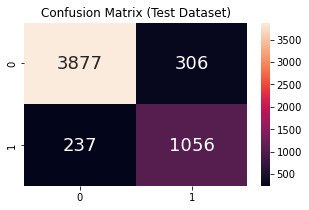

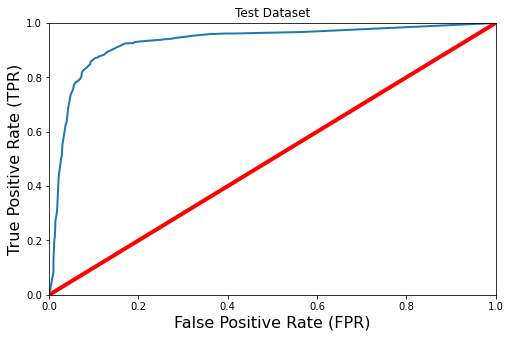

ROC-AUC-Score: 0.9286646924103917
-----



In [31]:
answer = model_performance(CART_best, X_train_os, X_test, y_train_os, y_test)
answer = ['Tuned_CART'] +['All']+ list(answer)

final_answer.loc[indexx] = answer
indexx += 1

#### 3.1 (c) CART v3 - Dataset with Selected Features + Hyperparameter Tuning

The hyperparameters will be tuned by using `GridSearchCV`.

In [32]:
# On selected features

# CART Parameters tunning 
CART = DecisionTreeClassifier()

## Search grid for optimal parameters
cart_param_grid = {"max_depth": [3,5,10],
              "max_features": [3,5,10]}


gsCART_2 = GridSearchCV(CART,param_grid = cart_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsCART_2.fit(X_train_os.iloc[:,selected_index],y_train_os)

CART_best2 = gsCART_2.best_estimator_

# Best score
gsCART_2.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.918177110305541

In [33]:
CART_best2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.893353 |
+-------------------------+----------+
| True Positive Rate      | 0.843774 |
+-------------------------+----------+
| True Negative Rate      | 0.908678 |
+-------------------------+----------+
| False Positive Rate     | 0.091322 |
+-------------------------+----------+
| False Negative Rate     | 0.156226 |
+-------------------------+----------+

Precision: 0.7406653088934148
Recall: 0.8437741686001546
f1_score: 0.7888647866955893


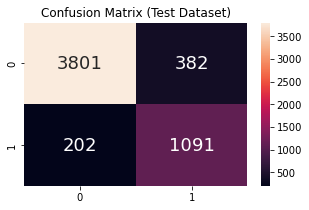

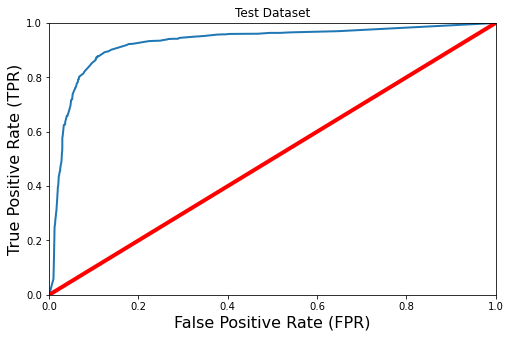

ROC-AUC-Score: 0.9266020586770857
-----



In [34]:
answer = model_performance(CART_best2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)
answer = ['Tuned_CART'] +['Selected']+  list(answer)

final_answer.loc[indexx] = answer
indexx += 1

### 3.2 Random Forest

Python Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### 3.2 (a) Random Forest v1 - Full Dataset + Default Hyperparameters

In [35]:
# On all dataset 
# RFC Parameters tunning 
RFC = RandomForestClassifier(n_estimators=500, oob_score=True, max_features="sqrt")
RFC.fit(X_train_os,y_train_os.values.reshape(-1))

RandomForestClassifier(n_estimators=500, oob_score=True)

In [36]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

-----
-> Test Dataset
+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Classification Accuracy | 0.910153  |
+-------------------------+-----------+
| True Positive Rate      | 0.834493  |
+-------------------------+-----------+
| True Negative Rate      | 0.933541  |
+-------------------------+-----------+
| False Positive Rate     | 0.0664595 |
+-------------------------+-----------+
| False Negative Rate     | 0.165507  |
+-------------------------+-----------+

Precision: 0.7951363301400147
Recall: 0.8344934261407579
f1_score: 0.8143396226415094


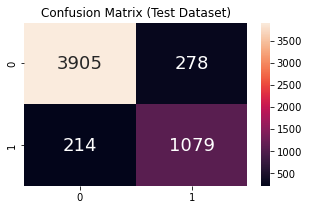

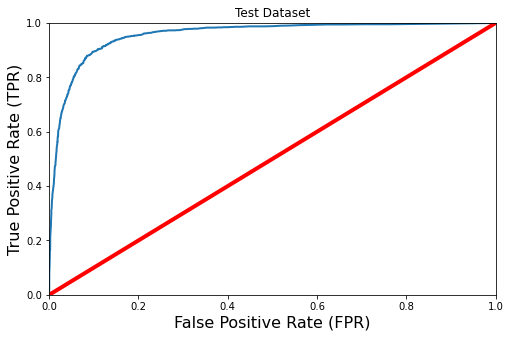

ROC-AUC-Score: 0.9560156668458252
-----



In [37]:
answer = model_performance(RFC, X_train_os, X_test, y_train_os, y_test)
answer = ['RF'] +['All'] + list(answer)

final_answer.loc[indexx] = answer
indexx += 1

#### 3.2 (b) Random Forest v2 - Full Dataset + Hyperparameter Tuning

In [93]:
# On all dataset 
# RFC Parameters tunning 
RFC = RandomForestClassifier(oob_score=True)
rfs = int(np.floor(np.sqrt(X_train_os.shape[1])))
rf_param_grid = {
    "max_features": [i for i in range(3, rfs, 1)],
    "criterion" : ["gini", "entropy"],
    "min_samples_leaf" : [1, 5],
    "min_samples_split" : [2, 4],
    "n_estimators": [200, 500]
}


gsRFC_1 = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC_1.fit(X_train_os,y_train_os.values.reshape(-1))

RFC_best = gsRFC_1.best_estimator_

# Best score
gsRFC_1.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
RFC_best.get_params()

-----
-> Test Dataset
+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Classification Accuracy | 0.910884  |
+-------------------------+-----------+
| True Positive Rate      | 0.830626  |
+-------------------------+-----------+
| True Negative Rate      | 0.935692  |
+-------------------------+-----------+
| False Positive Rate     | 0.0643079 |
+-------------------------+-----------+
| False Negative Rate     | 0.169374  |
+-------------------------+-----------+

Precision: 0.7997021593447505
Recall: 0.8306264501160093
f1_score: 0.8148710166919576


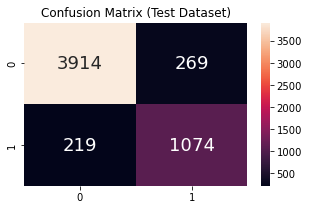

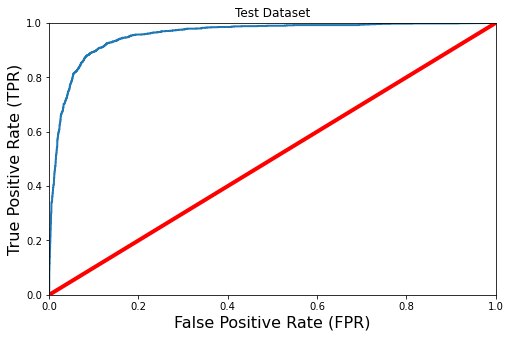

ROC-AUC-Score: 0.9564641177350448
-----



In [42]:
answer = model_performance(RFC_best, X_train_os, X_test, y_train_os, y_test)
answer = ['Tuned_RF'] +['All']+ list(answer)

final_answer.loc[indexx] = answer
indexx += 1

#### 3.2 (c) Random Forest v3 - Dataset with Selected Features + Hyperparameter Tuning

In [116]:
# On selected features
# RFC Parameters tunning 
RFC = RandomForestClassifier(oob_score=True)

# GridSerachCV
param_grid = {
    "max_features": ['auto', 'sqrt'],
    "criterion" : ["gini", "entropy"],
    "n_estimators": [200, 500]
}

gsRFC_2 = GridSearchCV(RFC,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4)

gsRFC_2.fit(X_train_selected,y_train_os.values.reshape(-1))

RFC_best2 = gsRFC_2.best_estimator_

# Best score
gsRFC_2.best_score_

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

0.9335577421025375

In [117]:
RFC_best2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.908145 |
+-------------------------+----------+
| True Positive Rate      | 0.832173 |
+-------------------------+----------+
| True Negative Rate      | 0.931628 |
+-------------------------+----------+
| False Positive Rate     | 0.068372 |
+-------------------------+----------+
| False Negative Rate     | 0.167827 |
+-------------------------+----------+

Precision: 0.7900146842878121
Recall: 0.8321732405259087
f1_score: 0.8105461393596988


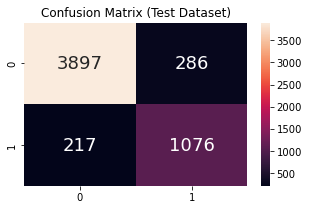

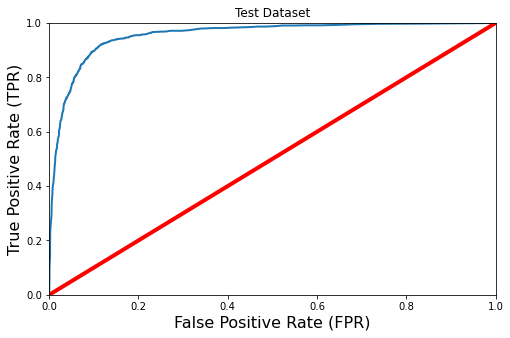

ROC-AUC-Score: 0.9554427849327157
-----



In [45]:
answer = model_performance(RFC_best2, X_train_selected, X_test_selected, y_train_os, y_test)
answer = ['Tuned_RF']+['Selected'] + list(answer)

final_answer.loc[indexx] = answer
indexx += 1

### 3.3 Support Vector Classifier (SVC)

Python Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#### 3.3 (a) SVC v1 - Full Dataset + Default Hyperparameters

In [46]:
# On all features

### SVM classifier
SVMC = SVC(probability=True)

SVMC.fit(X_train_os,y_train_os.values.reshape(-1))

SVC(probability=True)

In [47]:
SVMC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.764609 |
+-------------------------+----------+
| True Positive Rate      | 0.682135 |
+-------------------------+----------+
| True Negative Rate      | 0.790103 |
+-------------------------+----------+
| False Positive Rate     | 0.209897 |
+-------------------------+----------+
| False Negative Rate     | 0.317865 |
+-------------------------+----------+

Precision: 0.5011363636363636
Recall: 0.6821345707656613
f1_score: 0.5777923354077956


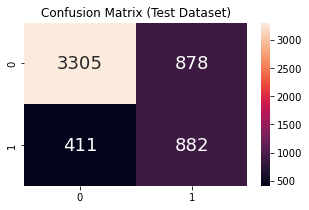

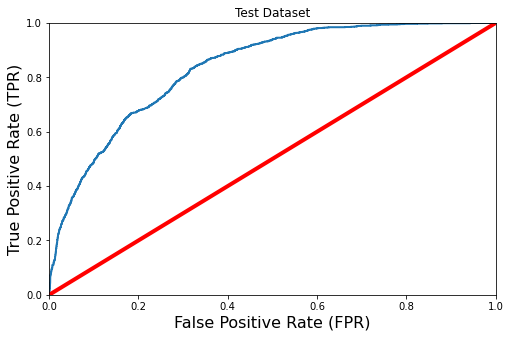

ROC-AUC-Score: 0.8353942106108786
-----



In [48]:
answer = model_performance(SVMC, X_train_os, X_test, y_train_os, y_test)
answer = ['SVM'] +['All']+list(answer)
indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

#### 3.3 (b) SVC v2 - Full Dataset + Hyperparameter Tuning

In [49]:
# On all features
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.01],
                  'C': [1]}

gsSVMC_1 = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC_1.fit(X_train_os,y_train_os.values.reshape(-1))

SVMC_best = gsSVMC_1.best_estimator_

# Best score
gsSVMC_1.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.8227861211807355

In [50]:
SVMC_best.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.799489 |
+-------------------------+----------+
| True Positive Rate      | 0.78809  |
+-------------------------+----------+
| True Negative Rate      | 0.803012 |
+-------------------------+----------+
| False Positive Rate     | 0.196988 |
+-------------------------+----------+
| False Negative Rate     | 0.21191  |
+-------------------------+----------+

Precision: 0.5529028757460662
Recall: 0.7880897138437741
f1_score: 0.6498724489795917


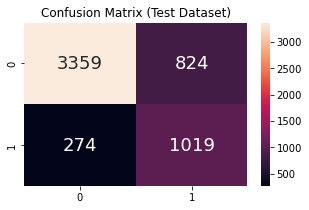

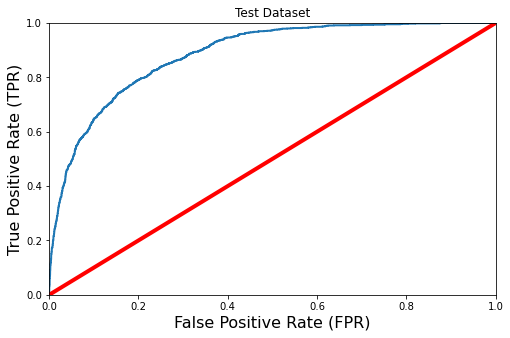

ROC-AUC-Score: 0.8850309108480372
-----



In [51]:
answer = model_performance(SVMC_best, X_train_os, X_test, y_train_os, y_test)

answer = ['Tuned_SVM'] +['All']+ list(answer)

final_answer.loc[indexx] = answer
indexx += 1

#### 3.3 (c) SVC v3 - Dataset with Selected Features + Hyperparameter Tuning

In [52]:
# On selected features

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.01],
                  'C': [1]}

gsSVMC_2 = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC_2.fit(X_train_os.iloc[:,selected_index],y_train_os.values.reshape(-1))

SVMC_best2 = gsSVMC_2.best_estimator_

# Best score
gsSVMC_2.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.8169860176074571

In [53]:
SVMC_best2.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.796384 |
+-------------------------+----------+
| True Positive Rate      | 0.773395 |
+-------------------------+----------+
| True Negative Rate      | 0.80349  |
+-------------------------+----------+
| False Positive Rate     | 0.19651  |
+-------------------------+----------+
| False Negative Rate     | 0.226605 |
+-------------------------+----------+

Precision: 0.5488474204171241
Recall: 0.7733952049497294
f1_score: 0.6420545746388443


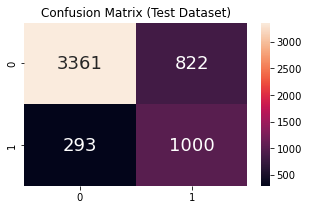

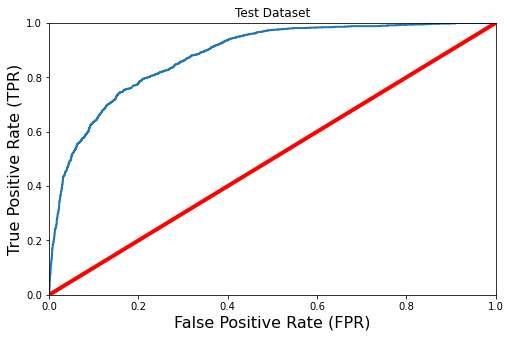

ROC-AUC-Score: 0.8804616298541272
-----



In [54]:
answer = model_performance(SVMC_best2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)
answer = ['Tuned_SVM'] +['Selected']+ list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

### 3.4 Extreme Gradient Boosting (XGBoost)

#### 3.4 (a) XGBoost v1 - Full Dataset + Default Hyperparameters

In [55]:
xgbc = XGBClassifier(use_label_encoder=False)
xgbc.get_params()

/Users/jianglei/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [56]:
xgbc.fit(X_train_os,y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

-----
-> Test Dataset
+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Classification Accuracy | 0.914354  |
+-------------------------+-----------+
| True Positive Rate      | 0.826759  |
+-------------------------+-----------+
| True Negative Rate      | 0.94143   |
+-------------------------+-----------+
| False Positive Rate     | 0.0585704 |
+-------------------------+-----------+
| False Negative Rate     | 0.173241  |
+-------------------------+-----------+

Precision: 0.8135464231354642
Recall: 0.8267594740912606
f1_score: 0.8200997314921366


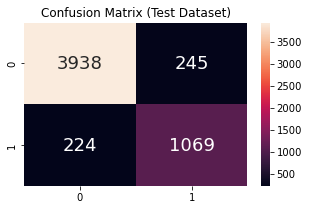

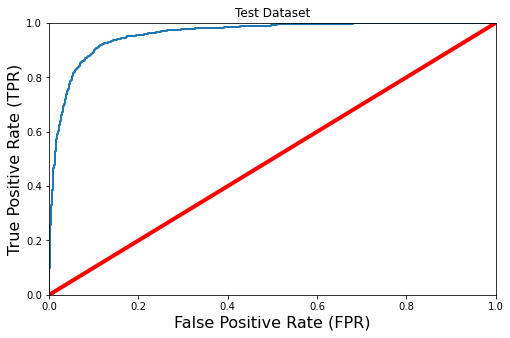

ROC-AUC-Score: 0.9590470321536793
-----



In [57]:
answer = model_performance(xgbc, X_train_os, X_test, y_train_os, y_test)
answer = ['XGB'] +['All']+ list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

#### 3.4 (b) XGBoost v2 - Full Dataset + Hyperparameter Tuning

In [58]:
import warnings
warnings.filterwarnings("ignore")     
### xgbc classifier
### on all dataset
xgbc = XGBClassifier(use_label_encoder=False)
xgbc_param_grid = {
    "estimator": [xgbc]   
    , "estimator__n_estimators": [400, 425, 450, 475]
    , "estimator__max_depth": [28, 29, 30, 31]
    , "estimator__eta": [.1]
    , "estimator__gamma": [0]
    , "estimator__subsample": [.7, .8]
    , "estimator__colsample_bytree": [.6, .7]
    , "estimator__colsample_bylevel": [.6, .7]
    , "estimator__min_child_weight": [1]
    , "col_transformer__num_pipe__imputer__n_neighbors": [7]
}

gsXGBC_1 = GridSearchCV(xgbc,param_grid = xgbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC_1.fit(X_train_os,y_train_os)

XGBC_best = gsXGBC_1.best_estimator_

# Best score
gsXGBC_1.best_score_

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[16:05:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:29] WARNING: /Users/runner/work/xgboost/xgboost/

[16:05:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:05:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:05:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:05:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:06:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:06:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:06:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:06:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:06:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:06:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

[16:07:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:07:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:07:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:07:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:07:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:07:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:09:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.



0.9338684619368202

In [59]:
XGBC_best.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'col_transformer__num_pipe__imputer__n

-----
-> Test Dataset
+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Classification Accuracy | 0.914354  |
+-------------------------+-----------+
| True Positive Rate      | 0.826759  |
+-------------------------+-----------+
| True Negative Rate      | 0.94143   |
+-------------------------+-----------+
| False Positive Rate     | 0.0585704 |
+-------------------------+-----------+
| False Negative Rate     | 0.173241  |
+-------------------------+-----------+

Precision: 0.8135464231354642
Recall: 0.8267594740912606
f1_score: 0.8200997314921366


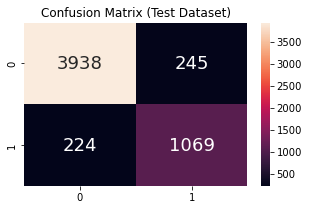

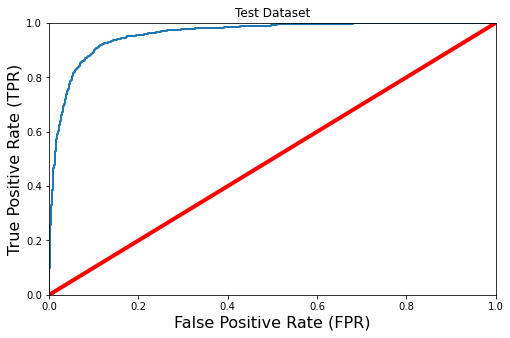

ROC-AUC-Score: 0.9590470321536793
-----



In [60]:
answer = model_performance(XGBC_best, X_train_os, X_test, y_train_os, y_test)
answer = ['Tuned_XGB'] +['All']+ list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

#### 3.4 (c) XGBoost v3 - Dataset with Selected Features + Hyperparameter Tuning

In [61]:
import warnings
warnings.filterwarnings("ignore")     
### xgbc
### on selected dataset

xgbc = XGBClassifier(use_label_encoder=False)
xgbc_param_grid = {
    "estimator": [xgbc]   
    , "estimator__n_estimators": [400, 425, 450, 475]
    , "estimator__max_depth": [28, 29, 30, 31]
    , "estimator__eta": [.1]
    , "estimator__gamma": [0]
    , "col_transformer__num_pipe__imputer__n_neighbors": [7]
}


gsXGBC_2 = GridSearchCV(xgbc,param_grid = xgbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC_2.fit(X_train_os.iloc[:,selected_index],y_train_os)

XGBC_best2 = gsXGBC_2.best_estimator_

# Best score
gsXGBC_2.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[16:08:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:08:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:08:50] WARNING: /Users/runner/work/xgboost/xgboost/py

[16:08:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:08:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__colsample_bylevel", "estimator__colsample_bytree", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__n_estimators", "estimator__subsample" } are not used.

[16:08:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost

[16:10:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_transformer__num_pipe__imputer__n_neighbors", "estimator", "estimator__eta", "estimator__gamma", "estimator__max_depth", "estimator__n_estimators" } are not used.



0.9315898498187467

In [62]:
XGBC_best2.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'col_transformer__num_pipe__imputer__n

-----
-> Test Dataset
+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Classification Accuracy | 0.910701  |
+-------------------------+-----------+
| True Positive Rate      | 0.813612  |
+-------------------------+-----------+
| True Negative Rate      | 0.940712  |
+-------------------------+-----------+
| False Positive Rate     | 0.0592876 |
+-------------------------+-----------+
| False Negative Rate     | 0.186388  |
+-------------------------+-----------+

Precision: 0.8092307692307692
Recall: 0.8136117556071152
f1_score: 0.8114153490165831


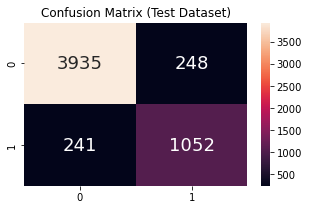

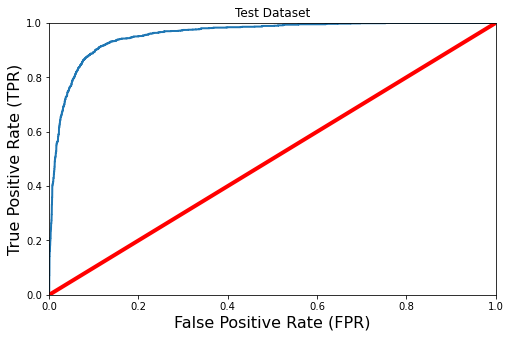

ROC-AUC-Score: 0.9568580260506426
-----



In [63]:
answer = model_performance(XGBC_best2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)
answer = ['Tuned_XGB']+['Selected'] + list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

### 3.5 Logistic Regression

Python Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 3.5 (a) Logistic Regression v1 - Full Dataset + Default Hyperparameters

In [64]:
lr = LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.865595 |
+-------------------------+----------+
| True Positive Rate      | 0.876257 |
+-------------------------+----------+
| True Negative Rate      | 0.8623   |
+-------------------------+----------+
| False Positive Rate     | 0.1377   |
+-------------------------+----------+
| False Negative Rate     | 0.123743 |
+-------------------------+----------+

Precision: 0.66296079578701
Recall: 0.8762567672080434
f1_score: 0.7548301132578281


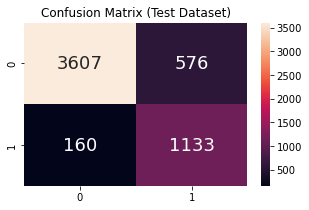

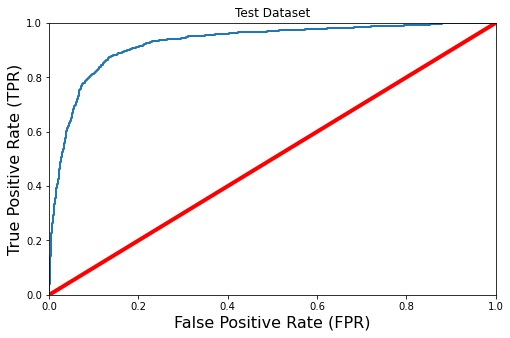

ROC-AUC-Score: 0.9273779498981163
-----



In [65]:
lr.fit(X_train_os,y_train_os)
answer = model_performance(lr, X_train_os, X_test, y_train_os, y_test)
answer = ['LR']+['All'] + list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

#### 3.5 (b) Logistic Regression v2 - Full Dataset + Hyperparameter Tuning

In [66]:
### logistic regression
### on all dataset
lr = LogisticRegression()
lr_param_grid = {'penalty': ['l1','l2']}

lr_1 = GridSearchCV(lr,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

lr_1.fit(X_train_os,y_train_os.values.reshape(-1))

lr_best = lr_1.best_estimator_

# Best score
lr_1.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


0.8936302433972034

In [67]:
lr_best.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.865595 |
+-------------------------+----------+
| True Positive Rate      | 0.876257 |
+-------------------------+----------+
| True Negative Rate      | 0.8623   |
+-------------------------+----------+
| False Positive Rate     | 0.1377   |
+-------------------------+----------+
| False Negative Rate     | 0.123743 |
+-------------------------+----------+

Precision: 0.66296079578701
Recall: 0.8762567672080434
f1_score: 0.7548301132578281


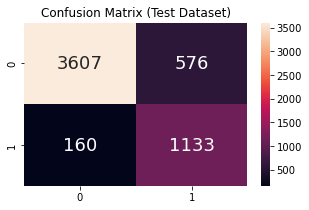

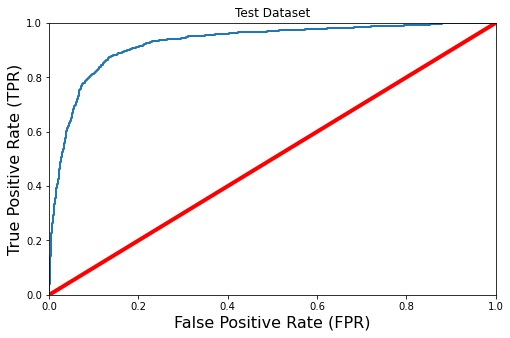

ROC-AUC-Score: 0.9273779498981163
-----



In [68]:
answer = model_performance(lr_best, X_train_os, X_test, y_train_os, y_test)
answer = ['Tuned_LR'] +['All']+ list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

#### 3.5 (c) Logistic Regression v3 - Dataset with Selected Features + Hyperparameter Tuning

In [69]:
### logistic regression classifier
### on selected dataset
lr = LogisticRegression()
lr_param_grid = {'penalty': ['l1','l2']}

lr_1 = GridSearchCV(lr,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

lr_1.fit(X_train_os.iloc[:,selected_index],y_train_os.values.reshape(-1))

lr_best2 = lr_1.best_estimator_

# Best score
lr_1.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


0.8957534955981357

In [70]:
lr_best2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

-----
-> Test Dataset
+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Classification Accuracy | 0.848064 |
+-------------------------+----------+
| True Positive Rate      | 0.832173 |
+-------------------------+----------+
| True Negative Rate      | 0.852976 |
+-------------------------+----------+
| False Positive Rate     | 0.147024 |
+-------------------------+----------+
| False Negative Rate     | 0.167827 |
+-------------------------+----------+

Precision: 0.6363098758131284
Recall: 0.8321732405259087
f1_score: 0.7211796246648794


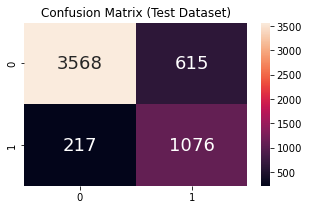

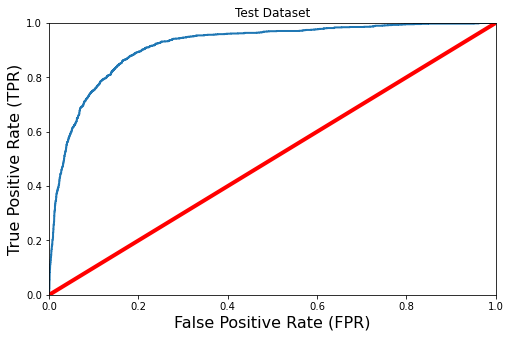

ROC-AUC-Score: 0.9165352560422539
-----



In [71]:
answer = model_performance(lr_best2, X_train_os.iloc[:,selected_index], X_test.iloc[:,selected_index], y_train_os, y_test)
answer = ['Tuned_LR']+['Selected'] + list(answer)

indexsize = final_answer.index.size
final_answer.loc[indexx] = answer
indexx += 1

In [79]:
final_answer = final_answer[final_answer['Model'].isin([ 'Tuned_RF', 'Tuned_XGB', 'Tuned_CART', 'Tuned_LR', 'Tuned_SVM'])]
final_answer.sort_values(by=['Accuracy'], ascending=False)

,Model,Dataset,Accuracy,TPR,TNR,FPR,FNR,Precision,Recall,F1 Score
10,Tuned_XGB,All,0.914354,0.826759,0.941430,0.058570,0.173241,0.813546,0.826759,0.820100
4,Tuned_RF,All,0.910884,0.830626,0.935692,0.064308,0.169374,0.799702,0.830626,0.814871
11,Tuned_XGB,Selected,0.910701,0.813612,0.940712,0.059288,0.186388,0.809231,0.813612,0.811415
5,Tuned_RF,Selected,0.908145,0.832173,0.931628,0.068372,0.167827,0.790015,0.832173,0.810546
1,Tuned_CART,All,0.900840,0.816705,0.926847,0.073153,0.183295,0.775330,0.816705,0.795480
2,Tuned_CART,Selected,0.893353,0.843774,0.908678,0.091322,0.156226,0.740665,0.843774,0.788865
13,Tuned_LR,All,0.865595,0.876257,0.862300,0.137700,0.123743,0.662961,0.876257,0.754830
14,Tuned_LR,Selected,0.848064,0.832173,0.852976,0.147024,0.167827,0.636310,0.832173,0.721180
7,Tuned_SVM,All,0.799489,0.788090,0.803012,0.196988,0.211910,0.552903,0.788090,0.649872
8,Tuned_SVM,Selected,0.796384,0.773395,0.803490,0.196510,0.226605,0.548847,0.773395,0.642055


In [83]:
final_answer[final_answer['Accuracy'] > 0.9].sort_values(by=['Recall'], ascending=False)

,Model,Dataset,Accuracy,TPR,TNR,FPR,FNR,Precision,Recall,F1 Score
5,Tuned_RF,Selected,0.908145,0.832173,0.931628,0.068372,0.167827,0.790015,0.832173,0.810546
4,Tuned_RF,All,0.910884,0.830626,0.935692,0.064308,0.169374,0.799702,0.830626,0.814871
10,Tuned_XGB,All,0.914354,0.826759,0.941430,0.058570,0.173241,0.813546,0.826759,0.820100
1,Tuned_CART,All,0.900840,0.816705,0.926847,0.073153,0.183295,0.775330,0.816705,0.795480
11,Tuned_XGB,Selected,0.910701,0.813612,0.940712,0.059288,0.186388,0.809231,0.813612,0.811415


## 4) Model Evaluation

### Model Performance Across Different Datasets

In [84]:
df_compare = final_answer[final_answer['Model'].isin([ 'Tuned_RF', 'Tuned_XGB'])]
df_compare

,Model,Dataset,Accuracy,TPR,TNR,FPR,FNR,Precision,Recall,F1 Score
4,Tuned_RF,All,0.910884,0.830626,0.935692,0.064308,0.169374,0.799702,0.830626,0.814871
5,Tuned_RF,Selected,0.908145,0.832173,0.931628,0.068372,0.167827,0.790015,0.832173,0.810546
10,Tuned_XGB,All,0.914354,0.826759,0.941430,0.058570,0.173241,0.813546,0.826759,0.820100
11,Tuned_XGB,Selected,0.910701,0.813612,0.940712,0.059288,0.186388,0.809231,0.813612,0.811415


In [85]:
df_compare_2 = df_compare.assign(Model_Datasset = df_compare['Model'] + '_' + df_compare['Dataset'])
df_compare_2

,Model,Dataset,Accuracy,TPR,TNR,FPR,FNR,Precision,Recall,F1 Score,Model_Datasset
4,Tuned_RF,All,0.910884,0.830626,0.935692,0.064308,0.169374,0.799702,0.830626,0.814871,Tuned_RF_All
5,Tuned_RF,Selected,0.908145,0.832173,0.931628,0.068372,0.167827,0.790015,0.832173,0.810546,Tuned_RF_Selected
10,Tuned_XGB,All,0.914354,0.826759,0.941430,0.058570,0.173241,0.813546,0.826759,0.820100,Tuned_XGB_All
11,Tuned_XGB,Selected,0.910701,0.813612,0.940712,0.059288,0.186388,0.809231,0.813612,0.811415,Tuned_XGB_Selected


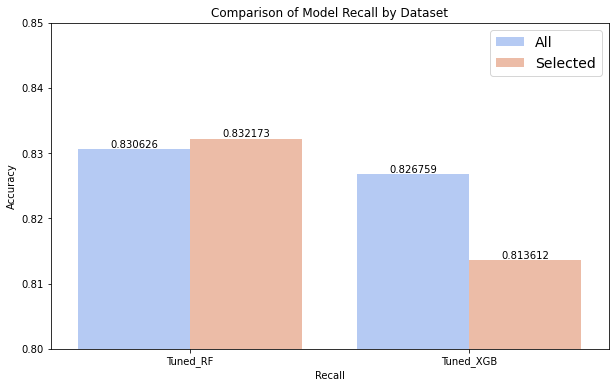

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
sb.barplot(data=df_compare_2, x='Model', y='Recall', hue='Dataset', ax=ax, palette="coolwarm")

# Add the text labels on top of the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
# Set y-axis range
plt.ylim(0.8, 0.85)
ax.legend(fontsize=14)
ax.set_xlabel('Recall')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Recall by Dataset')
plt.show()

## 5) Best Model - `Random Forest` with `Hyperparameter Tuning` on `Selected Dataset (8 Features)`

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 `K-fold` Cross Validation to Obtain Various Evaluation Metrics Results 

**The following metrics results will be computed:**
- Out-of-bag (oob) Score
- False Positive Rate
- True Positive Rate
- ROC AUC Score

In [122]:
leaderboard_model = RFC_best2

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

N = 10
oob = 0
importances = pd.DataFrame(np.zeros((X_train_selected.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=X_train_selected.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    leaderboard_model.fit(X_train_selected.iloc[trn_idx], y_train.iloc[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train.iloc[trn_idx], leaderboard_model.predict_proba(X_train_selected.iloc[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train.iloc[val_idx], leaderboard_model.predict_proba(X_train_selected.iloc[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1

Fold 1 OOB Score: 0.9103400295677885

Fold 2

Fold 2 OOB Score: 0.9105139577354553

Fold 3

Fold 3 OOB Score: 0.9107748499869553

Fold 4



/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

Fold 4 OOB Score: 0.9102530654839551

Fold 5



/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

Fold 5 OOB Score: 0.9100791373162884

Fold 6

Fold 6 OOB Score: 0.9100791373162884

Fold 7

Fold 7 OOB Score: 0.9093834246456214

Fold 8

Fold 8 OOB Score: 0.9073043478260869

Fold 9

Fold 9 OOB Score: 0.9105217391304348

Fold 10

Fold 10 OOB Score: 0.9093913043478261

Average OOB Score: 0.9098640993356699


### 5.2 Visualising ROC AUC Curve

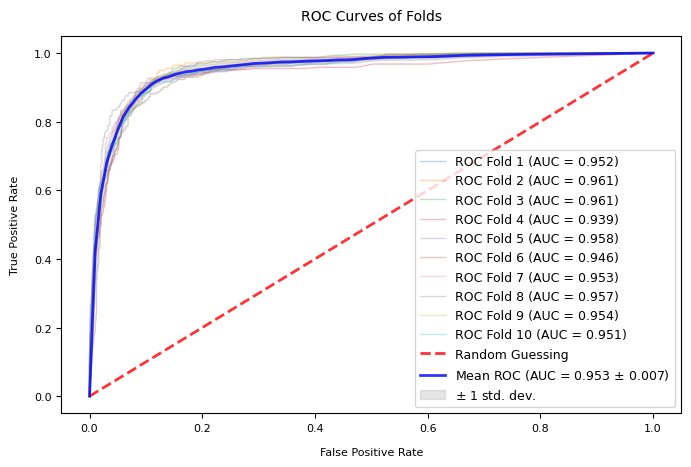

In [124]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(8, 5),dpi = 100)
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=8, labelpad=10)
    ax.set_ylabel('True Positive Rate', size=8, labelpad=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=10, y=1.02)
    ax.legend(loc='lower right', prop={'size': 9})
    
    plt.show()

plot_roc_curve(fprs, tprs)

### 5.3 Visualising Learning Curve

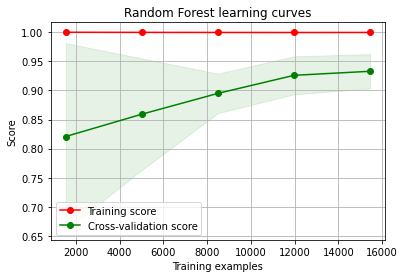

In [125]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(RFC_best2, 
                        "Random Forest learning curves",X_train_os.iloc[:,selected_index],y_train_os.values.reshape(-1),cv=kfold)


### 5.4 Calculate Model Confidence (Probobility in Prediction)

[]

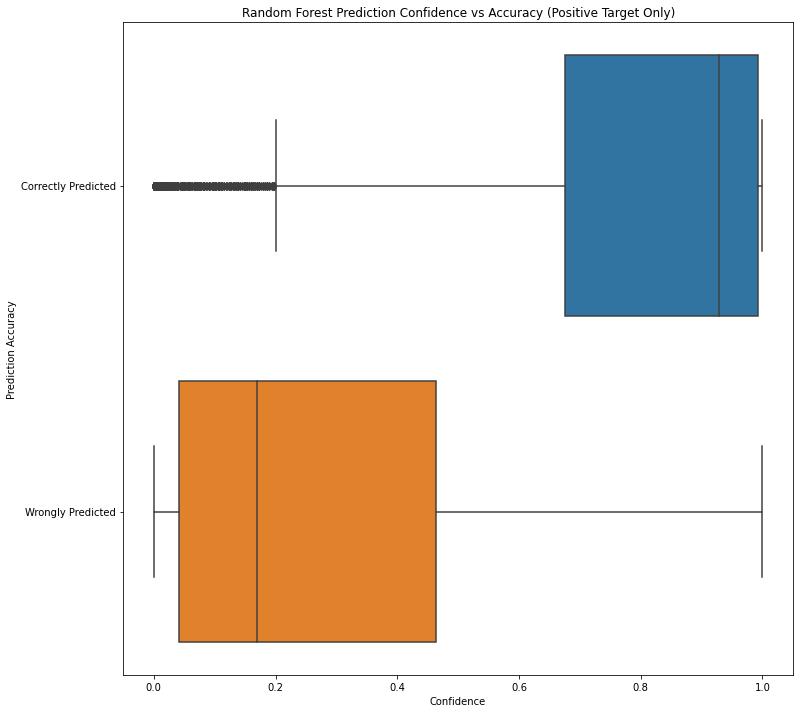

In [127]:
from scipy.stats import norm
from scipy.stats import t

RFC_prob = leaderboard_model.predict_proba(X_test_selected)
RFC_pred = leaderboard_model.predict(X_test_selected)

RFC_conf_pred = pd.DataFrame()
RFC_conf_pred['Target'] = y_test['target']
RFC_conf_pred['Prediction'] = RFC_pred
RFC_conf_pred['Probability'] = RFC_prob[:,1]
RFC_conf_pred['Confidence'] = (2*abs(RFC_conf_pred['Probability'] - 0.5))**2
RFC_conf_pred['Prediction Accuracy'] = RFC_conf_pred['Prediction'] == RFC_conf_pred['Target']
RFC_conf_pred['Prediction Accuracy'] = RFC_conf_pred['Prediction Accuracy'].replace({True: "Correctly Predicted", 
                                                                                     False: "Wrongly Predicted"})

import seaborn as sns
plt.figure(figsize=(12,12))
plt.title("Random Forest Prediction Confidence vs Accuracy (Positive Target Only)")
sns.boxplot(data=RFC_conf_pred, x='Confidence', y='Prediction Accuracy')
plt.plot()

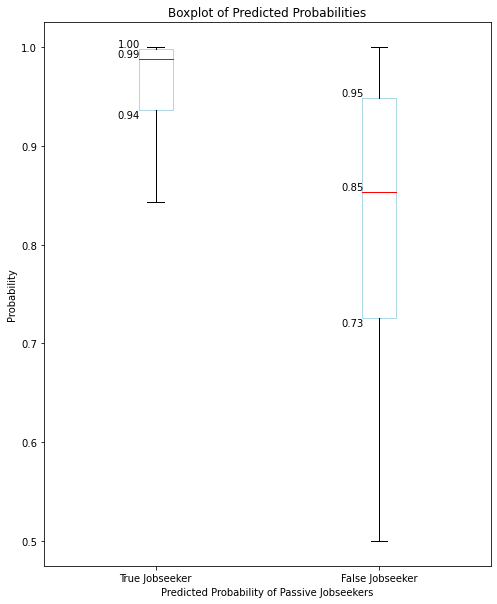

In [147]:
# obtain predicted probabilities for each test case
probs = leaderboard_model.predict_proba(X_test_selected)
conf_val = np.abs(probs- 0.5) + 0.5

# create lists of predicted and true class labels
predicted_labels = np.argmax(conf_val, axis=1)
true_labels = y_test

# determine which predictions were correct and which were incorrect
correctly_predicted = predicted_labels == true_labels['target'].values
incorrectly_predicted = predicted_labels != true_labels['target'].values

# create subsets of predicted probabilities for correctly and incorrectly predicted instances
correct_probs = conf_val[correctly_predicted, 1]
incorrect_probs = conf_val[incorrectly_predicted, 1]

box_data = [correct_probs, incorrect_probs]
labels = ['True Jobseeker', 'False Jobseeker']
box_props = dict(color='lightblue')
median_props = dict(color='red')

plt.figure(figsize=(8, 10))
plt.boxplot(box_data, labels=labels, showfliers=False, boxprops=box_props, medianprops=median_props)
plt.xlabel('Predicted Probability of Passive Jobseekers')
plt.ylabel('Probability')
plt.title('Boxplot of Predicted Probabilities')

# add annotations for median and IQR values
medians = [np.median(x) for x in box_data]
q1s = [np.percentile(x, 25) for x in box_data]
q3s = [np.percentile(x, 75) for x in box_data]
for i in range(len(labels)):
    plt.text(i+1-0.12, medians[i], f"{medians[i]:.2f}", ha='center', va='bottom')
    plt.text(i+1-0.12, q1s[i], f"{q1s[i]:.2f}", ha='center', va='top')
    plt.text(i+1-0.12, q3s[i], f"{q3s[i]:.2f}", ha='center', va='bottom')
plt.show()

